In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)
df = pd.read_csv('https://raw.githubusercontent.com/Kukulis2/Gilusis/main/WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',')
print("The dataframe has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataframe has 7043 rows and 21 columns.


In [ ]:
print(df.iloc[0])

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object


In [ ]:
df.drop(columns=["customerID"], inplace=True)
print(df.iloc[0])

gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object


In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 32
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<ipython-input-49-9bfe2c434cd4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Churn'] = df2['Churn'].replace({'No': 0, 'Yes': 1})
<ipython-input-49-9bfe2c434cd4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')


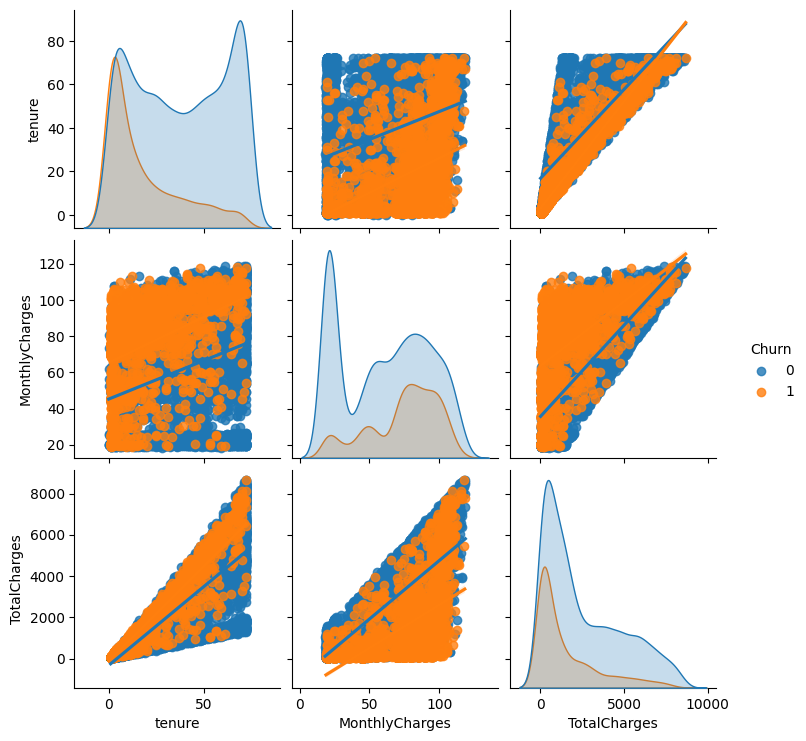

In [ ]:
import seaborn as sns

df2 = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

df2['Churn'] = df2['Churn'].replace({'No': 0, 'Yes': 1})

df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')

sns.pairplot(df2, kind='reg', hue="Churn")

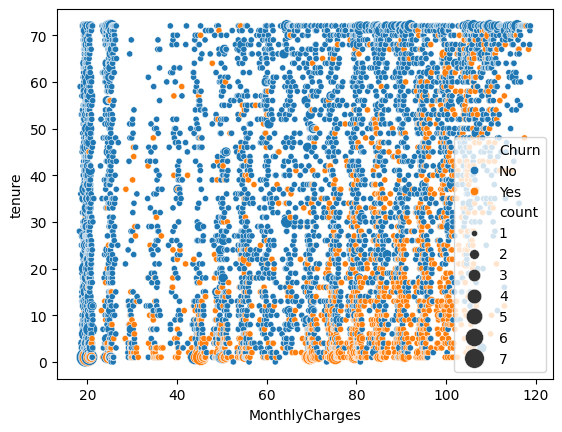

In [ ]:
# Get the counts of each combination of MonthlyCharges, tenure, and Churn
counts = df.groupby(['MonthlyCharges', 'tenure', 'Churn']).size().reset_index(name='count')

# Create a scatter plot with point size reflecting the frequency of values
sns.scatterplot(data=counts, x='MonthlyCharges', y='tenure', hue="Churn", size='count', sizes=(20, 200))

# Show the plot
plt.show()


<ipython-input-52-4f9b96fed2b2>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['MonthlyCharges_mid', 'tenure_mid', 'Churn']).size().reset_index(name='count')


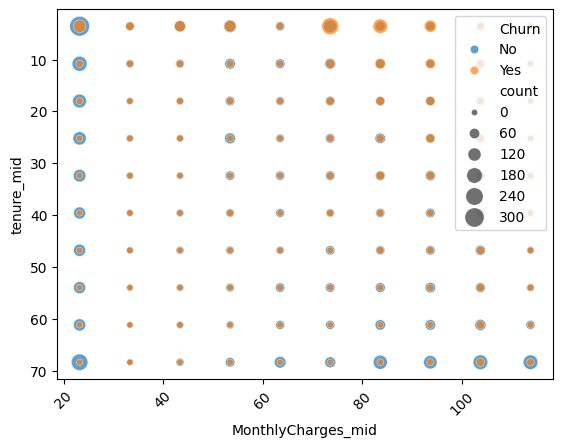

In [ ]:
# Bin the MonthlyCharges and tenure into discrete categories and get the midpoints of each bin
df['MonthlyCharges_bin'] = pd.cut(df['MonthlyCharges'], bins=10)
df['tenure_bin'] = pd.cut(df['tenure'], bins=10)

# Calculate the midpoints of the bins for plotting
df['MonthlyCharges_mid'] = df['MonthlyCharges_bin'].apply(lambda x: x.mid)
df['tenure_mid'] = df['tenure_bin'].apply(lambda x: x.mid)

# Group by binned categories and Churn
counts = df.groupby(['MonthlyCharges_mid', 'tenure_mid', 'Churn']).size().reset_index(name='count')

# Create a scatter plot with point size reflecting the frequency of values and add transparency
sns.scatterplot(data=counts, x='MonthlyCharges_mid', y='tenure_mid', hue='Churn', size='count', sizes=(20, 200), alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

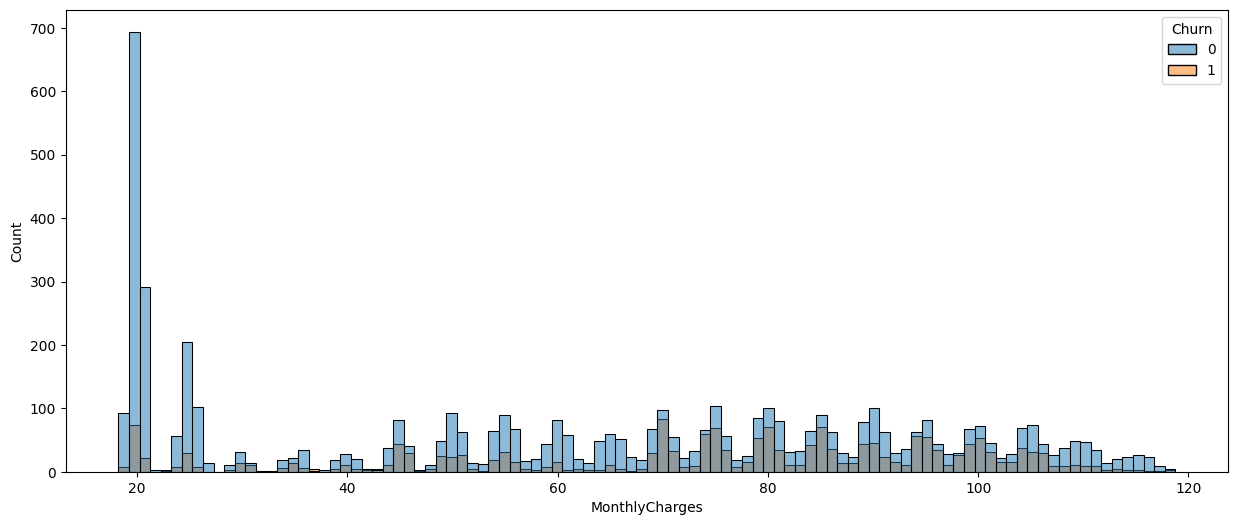

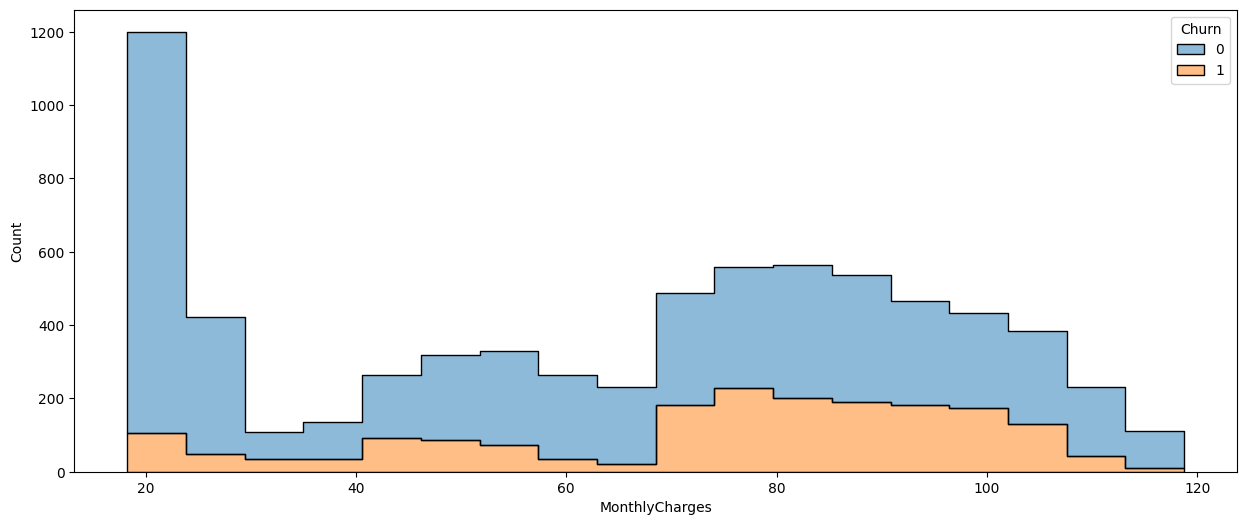

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.histplot(x="MonthlyCharges", hue="Churn", data=df2, binwidth=1)

plt.figure(figsize=(15, 6))
sns.histplot(x="MonthlyCharges", hue="Churn", data=df2, multiple='stack', element='step', alpha=0.5)


<Axes: xlabel='Churn', ylabel='Count'>

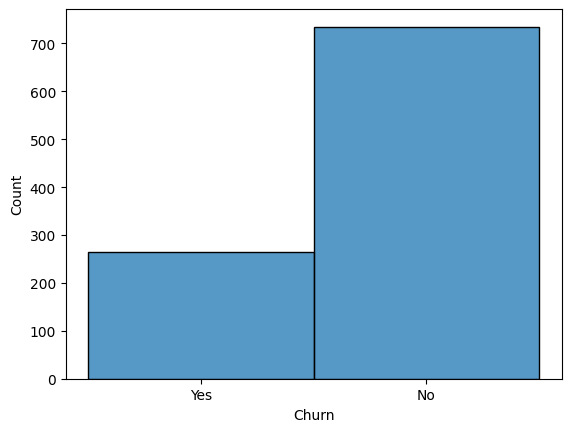

In [ ]:
df_random = df.sample(n=1000, random_state=42)
sns.histplot(x="Churn" , data=df_random)

<Axes: xlabel='Churn', ylabel='Count'>

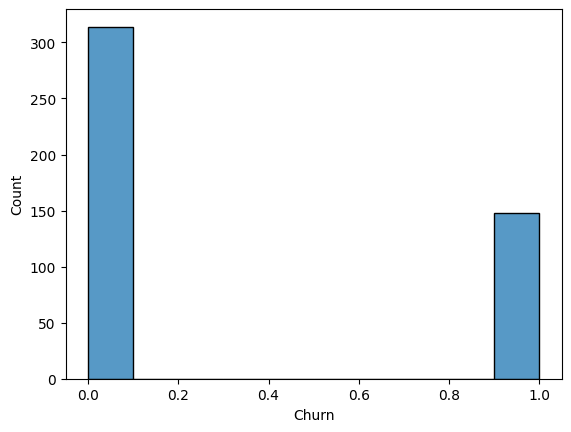

In [ ]:
df3 = df2.query("MonthlyCharges >= 40 and MonthlyCharges <= 50 ")
sns.histplot(x="Churn"  , data=df3)


#SQL examples

In [ ]:
#!pip install -q -U pandasql
#!pip install -q sqlalchemy==1.4.46
!pip install -q sqlalchemy

In [ ]:
!pip install -q -U pandasql

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/d

In [ ]:
from pandasql import sqldf

query = """
        SELECT AVG(YearlyIncome) AS mean_income,
               MIN(TotalChildren) AS min_children,
               MAX(NumberCarsOwned) AS max_cars
        FROM df
        """
result = sqldf(query)
print(result)
print()

query = " SELECT CommuteDistance , COUNT(1) FROM df GROUP BY CommuteDistance """
result = sqldf(query)
print(result)
print()

query = """
        SELECT 10000*CAST(YearlyIncome/10000 AS INTEGER) YI_bin,
        SUM(CASE WHEN BikeBuyer = 0 THEN 1 ELSE 0 END) as No_BikeBuyer,
        SUM(CASE WHEN BikeBuyer = 1 THEN 1 ELSE 0 END) as Yes_BikeBuyer
        FROM df
        GROUP BY CAST(YearlyIncome/10000 AS INTEGER)
        """
result = sqldf(query)
print(result)
print()



#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


Churn_x = df.drop('Churn', axis=1)
Churn_y = df['Churn']

Churn_x_encoded = pd.get_dummies(Churn_x, drop_first=True)
Churn_x_encoded




,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,...,"tenure_bin_(21.6, 28.8]","tenure_bin_(28.8, 36.0]","tenure_bin_(36.0, 43.2]","tenure_bin_(43.2, 50.4]","tenure_bin_(50.4, 57.6]","tenure_bin_(57.6, 64.8]","tenure_bin_(64.8, 72.0]",MonthlyCharges_mid_33.325,MonthlyCharges_mid_43.375,MonthlyCharges_mid_53.425,MonthlyCharges_mid_63.475,MonthlyCharges_mid_73.525,MonthlyCharges_mid_83.57499999999999,MonthlyCharges_mid_93.625,MonthlyCharges_mid_103.67500000000001,MonthlyCharges_mid_113.725,tenure_mid_10.8,tenure_mid_18.0,tenure_mid_25.200000000000003,tenure_mid_32.4,tenure_mid_39.6,tenure_mid_46.8,tenure_mid_54.0,tenure_mid_61.2,tenure_mid_68.4
0,0,1,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,0,2,53.85,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,2,70.70,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
7039,0,72,103.20,False,True,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
7040,0,11,29.60,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
7041,1,4,74.40,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(Churn_x_encoded, Churn_y, test_size=0.2)

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)


dtree.fit(X_train, y_train)

predicitions = dtree.predict(X_test)

acc = accuracy_score(y_test, predicitions)
acc

0.7991483321504613

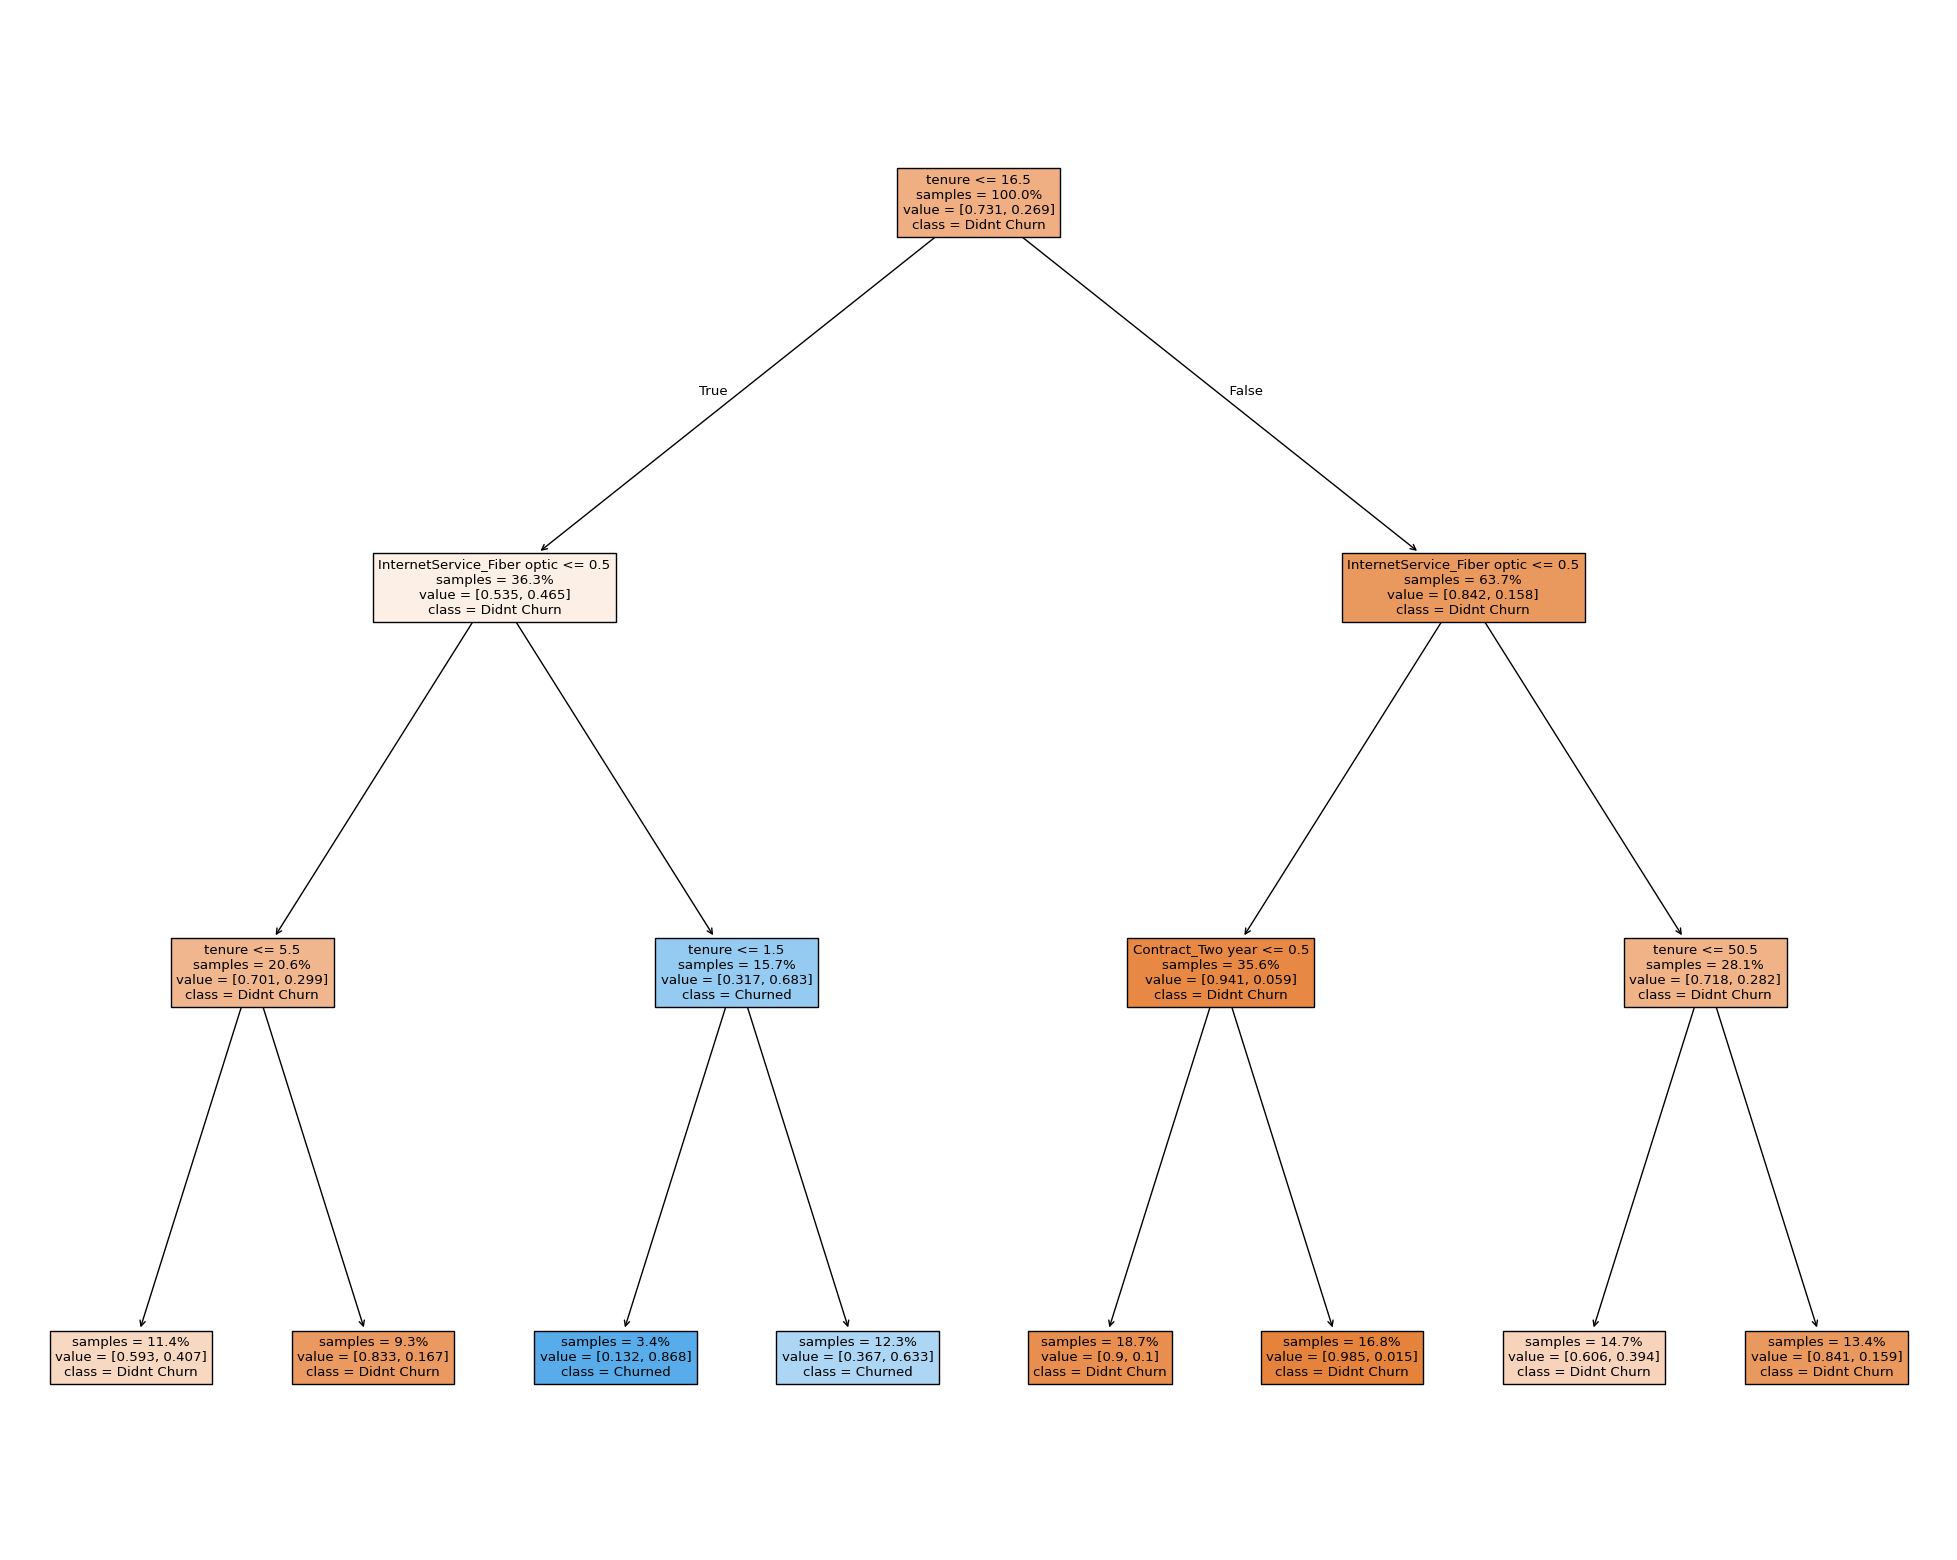

In [ ]:
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree, feature_names = Churn_x_encoded.columns, class_names=['Didnt Churn', 'Churned'],    impurity=False,    proportion=True,  filled=True)
fig.savefig('decision_tree_plot_V1.png')

In [ ]:

tree_rules = export_text(dtree, feature_names=X_train.columns.tolist())
print(tree_rules)

|--- tenure <= 16.50
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- tenure <= 5.50
|   |   |   |--- class: No
|   |   |--- tenure >  5.50
|   |   |   |--- class: No
|   |--- InternetService_Fiber optic >  0.50
|   |   |--- tenure <= 1.50
|   |   |   |--- class: Yes
|   |   |--- tenure >  1.50
|   |   |   |--- class: Yes
|--- tenure >  16.50
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- Contract_Two year <= 0.50
|   |   |   |--- class: No
|   |   |--- Contract_Two year >  0.50
|   |   |   |--- class: No
|   |--- InternetService_Fiber optic >  0.50
|   |   |--- tenure <= 50.50
|   |   |   |--- class: No
|   |   |--- tenure >  50.50
|   |   |   |--- class: No



In [1]:
from sklearn.tree import export_graphviz
#from sklearn.model_selection import train_test_split
#import pandas as pd
import graphviz

dot_data = export_graphviz(dtree, out_file=None,  feature_names=Churn_x_encoded.columns,   class_names=['0', '1'],  filled=True, rounded=True, special_characters=True) # Generate graphviz object

graph = graphviz.Source(dot_data)
graph.render("decision_tree_plot_V2", format="png", cleanup=True)

NameError: name 'dtree' is not defined